In [530]:
!pip install torch matplotlib numpy

In [531]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.optim import SGD

# Datasets

In [162]:
class SimpleTrainDataset(Dataset):
    def __init__(self):
        
        self.x = torch.arange(-3,3,0.01).view(-1,1)
        self.y = -3 * X + torch.randn(X.size())
        self.len=self.x.shape[0]

        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    
    def __len__(self):
        return self.len

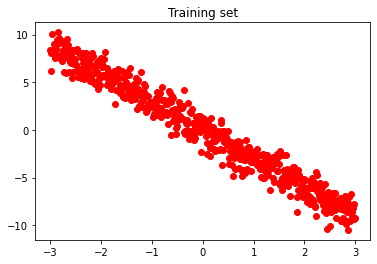

In [163]:
dataset = SimpleTrainDataset()
plt.plot(dataset.x.numpy(), dataset.y.numpy(), "ro")
plt.title("Training set")
plt.show()

In [164]:
class SimpleValidationDataset(Dataset):
    def __init__(self):
        
        self.x = torch.arange(-3,3,0.01).view(-1,1)
        self.y = -2*X+torch.randn(X.size()) + 0.42*torch.randn(X.size())
        self.len=self.x.shape[0]

        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    
    def __len__(self):
        return self.len

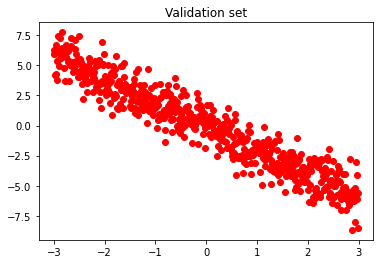

In [166]:
dataset = SimpleValidationDataset()
plt.plot(dataset.x.numpy(), dataset.y.numpy(), "ro")
plt.title("Validation set")
plt.show()

In [167]:
class SimpleTestDataset(Dataset):
    def __init__(self):
        
        self.x = torch.arange(-3,3,0.01).view(-1,1)
        self.y = -3.44*X+torch.randn(X.size()) + 42*torch.randn(X.size())*0.1
        self.len=self.x.shape[0]

        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    
    def __len__(self):
        return self.len

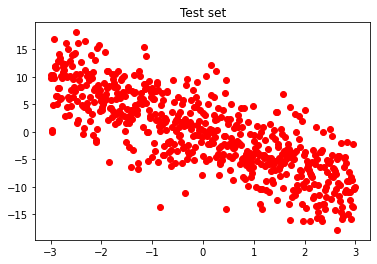

In [168]:
dataset = SimpleTestDataset()
plt.plot(dataset.x.numpy(), dataset.y.numpy(), "ro")
plt.title("Test set")
plt.show()

# Model Definition

In [169]:
class LR(nn.Module):
    def __init__(self, in_size, out_size):
        super(LR, self).__init__()
        self.linear1 = nn.Linear(in_size, out_size)
        
    
    def forward(self, x):
        out = self.linear1(x)
        return out

# Training

## Training loop

In [594]:
def train(dataset, learning_rate, desired_batch_size, number_of_epochs=4):
    
    trainloader = DataLoader(dataset=dataset, batch_size=desired_batch_size)
    
    model = LR(in_size=1, out_size=1)
    model.train()
    
    optimizer = SGD(model.parameters(),lr=learning_rate)
    criterion = nn.MSELoss()
    
    losses = []
    
    for epoch in range(number_of_epochs):
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
            
    return losses, model

In [505]:
train_dataset = SimpleTrainDataset()

## Batch Size Analysis

In [519]:
learning_rate=0.01
number_of_epochs=10

In [520]:
batch_size_1 = train(train_dataset, learning_rate, desired_batch_size=1, number_of_epochs=number_of_epochs)

In [521]:
batch_size_5 = train(train_dataset, learning_rate, desired_batch_size=5, number_of_epochs=number_of_epochs)

In [522]:
batch_size_25 = train(train_dataset, learning_rate,desired_batch_size=25, number_of_epochs=number_of_epochs)

In [523]:
batch_size_100 = train(train_dataset, learning_rate, desired_batch_size=100, number_of_epochs=number_of_epochs)

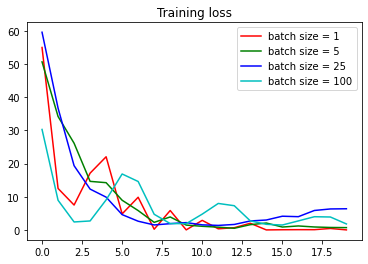

In [524]:
n=20

plt.plot(batch_size_1[0:n], "r", label="batch size = 1")
plt.plot(batch_size_5[0:n], "g", label="batch size = 5")
plt.plot(batch_size_25[0:n], "b", label="batch size = 25")
plt.plot(batch_size_100[0:n], "c", label="batch size = 100")
plt.legend()
plt.title("Training loss")
plt.show()

## Learning Rates Analysis

In [595]:
validation_dataset = SimpleValidationDataset()
validationloader = DataLoader(dataset=validation_dataset, batch_size=100)

In [611]:
learning_rates=[0.001, 0.005, 0.01, 0.05, 0.1]
number_of_epochs=400

learning_rates_losses = {}

for learning_rate in learning_rates:
    _, model = train(validation_dataset, learning_rate,desired_batch_size=25, number_of_epochs=number_of_epochs)
    
    losses = []
    
    for x, y in validationloader:
        yhat = model(x)
        loss = criterion(yhat, y)
        losses.append(loss.item())
    
    learning_rates_losses[learning_rate] = np.mean(losses)

In [617]:
print(f"Best learning rate : {min(learning_rates_losses, key=learning_rates_losses.get)}")

Best learning rate : 0.001
